In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import datetime
# import pytz

import matplotlib.pyplot as plt

In [11]:
import load_raw

# load labelled raw data
lr = load_raw.load_dta()
lr.head()

,channel 1,channel 2,channel 3,channel 4,timestamp(ms),keypressed
0,-19410.30,-18125.56,-28213.76,25508.35,1.581898e+12,NaN
1,-19422.86,-18301.96,-28234.25,25617.09,1.581898e+12,NaN
2,-19389.04,-17962.26,-28220.28,25626.86,1.581898e+12,NaN
3,-19374.13,-17722.12,-28198.13,25529.27,1.581898e+12,NaN
4,-19410.57,-18055.60,-28208.26,25486.98,1.581898e+12,NaN


In [12]:
# trim the data frame for plotting
keypressed = lr['keypressed']
start_idx = keypressed.first_valid_index()
stop_idx = keypressed.last_valid_index()
lr_trimmed = lr.truncate(before=start_idx-300,after=stop_idx+300)
only_keypressed = lr_trimmed[lr_trimmed['keypressed'].notna()]

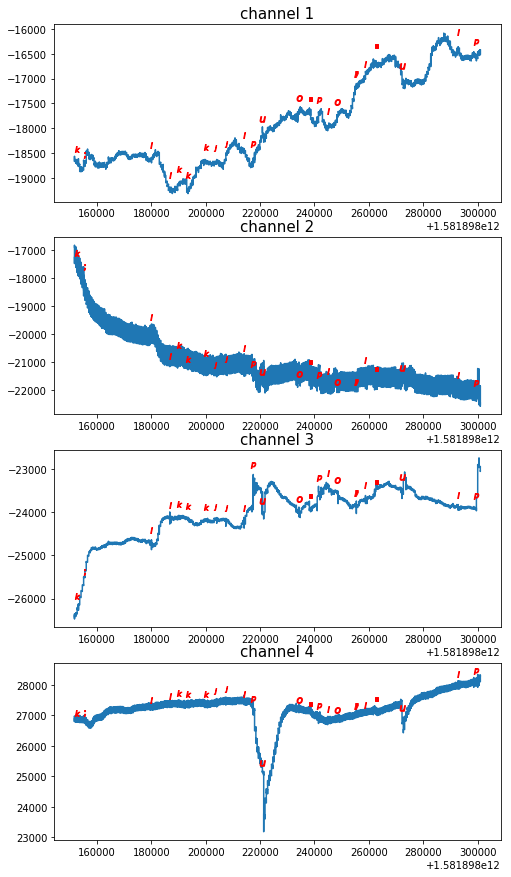

In [13]:
channels = [i for i in lr.columns if i not in ('timestamp(ms)','keypressed')]
count=0
plt.figure(figsize=(8,15))
for channel_name in channels:
    count+=1
    ch = lr_trimmed[channel_name].values
    timestamps = lr_trimmed['timestamp(ms)'].values
    
    ###
    ch_keypress = only_keypressed[channel_name].values
    ts_keypress = only_keypressed['timestamp(ms)'].values
    
    np.unique(only_keypressed['keypressed'].values)
    
    keys_pressed_unique = np.unique(only_keypressed['keypressed'].values)
    ts_keypress = []
    ch_i_keypress = []
    labels = []
    for letter in keys_pressed_unique:
        labels.append('$'+letter+'$')
        ch_i_keypress.append(only_keypressed.loc[only_keypressed['keypressed']==letter][channel_name].values)
        ts_keypress.append(only_keypressed.loc[only_keypressed['keypressed']==letter]['timestamp(ms)'].values)
        
    # make the plot
    plt.subplot(len(channels),1,count)
    plt.title(channel_name,fontsize=15)
    plt.plot(timestamps,ch)
    for x,y,lab in zip(ts_keypress,ch_i_keypress,labels):
        plt.plot(x,y+np.ones(len(y))*300,marker=lab,color='red',linestyle='None')

plt.show()


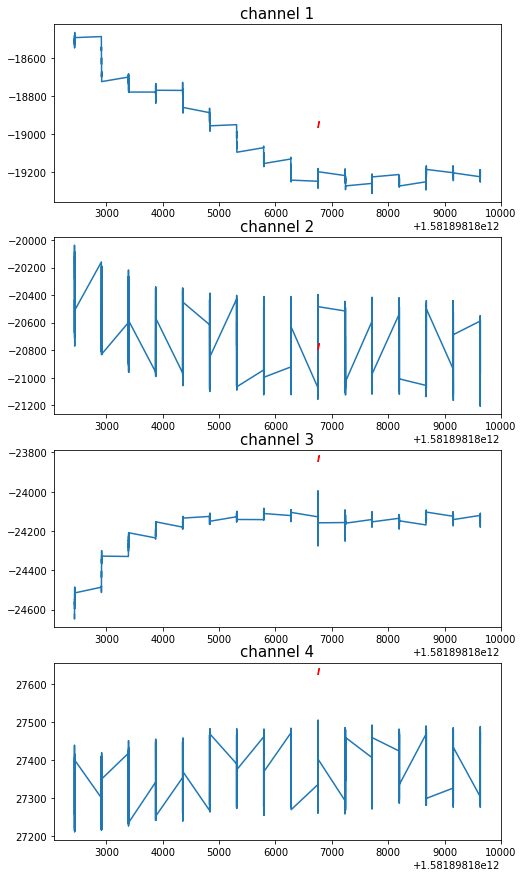

In [9]:
import display_methods
display_methods.plot_ts(channel=[1,2,3,4],time_interval=(0.2,0.25))

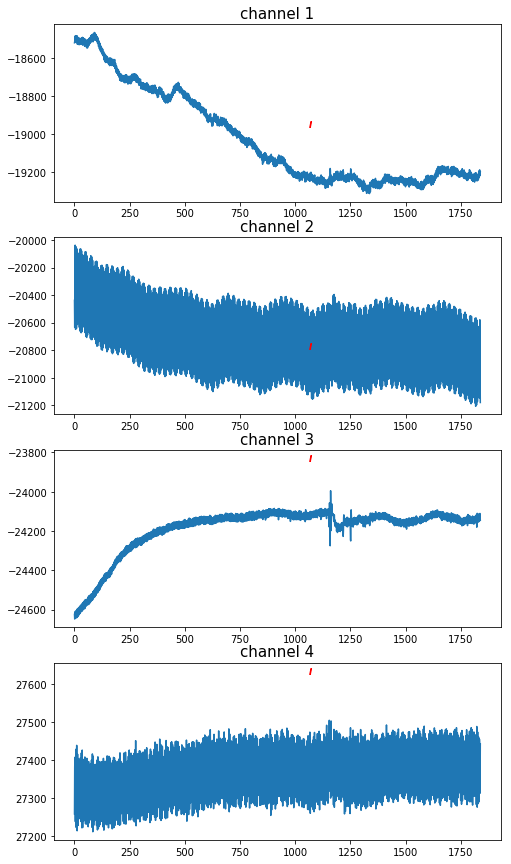

In [2]:
import display_methods
display_methods.plot_ts_2(channel=[1,2,3,4],time_interval=(0.2,0.25))

In [8]:
ch1 = lr_trimmed['channel 1'].values
timestamps = lr_trimmed['timestamp(ms)'].values


###
ch1_keypress = only_keypressed['channel 1'].values
ts_keypress = only_keypressed['timestamp(ms)'].values

# keys_pressed = only_keypressed['keypressed'].values
# # put some $$ around these to plot them
# keys_pressed = ['$'+i+'$' for i in keys_pressed]
# # make a list of markers


keys_pressed_unique = np.unique(only_keypressed['keypressed'].values)
ts_keypress = []
ch_i_keypress = []
labels = []
for letter in keys_pressed_unique:
    labels.append('$'+letter+'$')
    ch_i_keypress.append(only_keypressed.loc[only_keypressed['keypressed']==letter]['channel 1'].values)
    ts_keypress.append(only_keypressed.loc[only_keypressed['keypressed']==letter]['timestamp(ms)'].values)


    
"""
get a list of keys pressed
for each of the individual keys pressed
get a list with 
- the marker type (eg : $j$)
- array of times pressed
- array of position values

"""


'\nget a list of keys pressed\nfor each of the individual keys pressed\nget a list with \n- the marker type (eg : $j$)\n- array of times pressed\n- array of position values\n\n'

In [125]:
len(ch_i_keypress),len(ts_keypress),len(labels)
len(ch_i_keypress[3]),len(ts_keypress[3]),labels[3]

(3, 3, '$i$')

In [126]:
lr.loc[lr['keypressed']=='j']

,channel 1,channel 2,channel 3,channel 4,timestamp(ms),keypressed
23797,-18689.90,-21396.81,-24185.26,27513.88,1.581898e+12,j
24649,-18621.75,-21174.99,-24209.84,27560.88,1.581898e+12,j


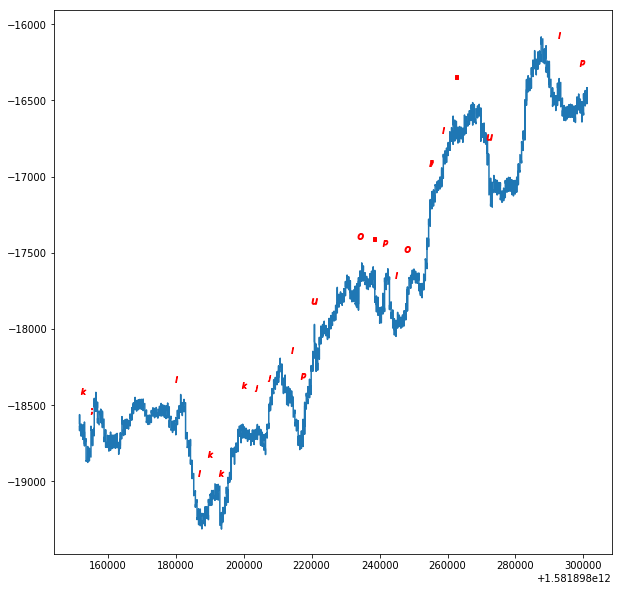

In [127]:
# plot channel 1
plt.figure(figsize=(10,10))
plt.plot(timestamps,ch1)
for x,y,lab in zip(ts_keypress,ch_i_keypress,labels):
    plt.plot(x,y+np.ones(len(y))*300,marker=lab,color='red',linestyle='None')

# plt.plot(ts_keypress,ch1_keypress+np.ones(len(ts_keypress))*300,marker='$f$',color='red',linestyle='None')